In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN  # 聚类
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # 模型评估/矩阵/分数
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder # 数据规范,极大极小值,标准化,标签转化

from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import cdist # 聚类效果检验
from sklearn.svm import SVC # 支持向量机分类器算法
from sklearn.compose import ColumnTransformer # 列转化
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   # 线性分类
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier # 随机森林
from sklearn.naive_bayes import GaussianNB # 贝叶斯
from sklearn.neighbors import KNeighborsClassifier # K近邻算法
from sklearn.pipeline import Pipeline # 整合数据预处理步骤
from sklearn.model_selection import GridSearchCV # 模型调优,系统地遍历多种参数组合
from sklearn.feature_selection import chi2 # 卡方检验
from sklearn.neural_network import MLPClassifier #神经网络
from sklearn import metrics # 评估分类,聚类的效果
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import collections
import time
import warnings

%matplotlib inline
warnings.filterwarnings('ignore') # 忽略错误
plt.rcParams['font.family'] = 'Microsoft YaHei' # 显示汉字
plt.rcParams['axes.unicode_minus'] = False

# 数据读取和处理

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# 检查空值
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# 检查格式
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# 数据标签查看
for i in df.columns:  # 查看数据分布和数据类型。
    a = df[i].value_counts()
    print(f'{i} 的行数是：{a.sum()}')
    print(f'\n{a} 的数据类型是：{df[i].dtypes}')


customerID 的行数是：7043

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 的数据类型是：object
gender 的行数是：7043

Male      3555
Female    3488
Name: gender, dtype: int64 的数据类型是：object
SeniorCitizen 的行数是：7043

0    5901
1    1142
Name: SeniorCitizen, dtype: int64 的数据类型是：int64
Partner 的行数是：7043

No     3641
Yes    3402
Name: Partner, dtype: int64 的数据类型是：object
Dependents 的行数是：7043

No     4933
Yes    2110
Name: Dependents, dtype: int64 的数据类型是：object
tenure 的行数是：7043

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 的数据类型是：int64
PhoneService 的行数是：7043

Yes    6361
No      682
Name: PhoneService, dtype: int64 的数据类型是：object
MultipleLines 的行数是：7043

No                  3390
Yes                 2971
No phone service     682
Name: Multi

In [7]:
# 空格转换成空值，并并使用总销售额进行填充。
df['TotalCharges'] = df['TotalCharges'].replace({' ':np.nan})
df['TotalCharges'].fillna(df['MonthlyCharges'],inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [8]:
# 确认格式修改完毕
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# 修改英文列名为中文
df.columns = ['客户ID', '性别', '是否老年人', '是否有配偶', '是否有家属', '服务期', '是否有电话服务', 
              '是否有多线服务', '互联网服务类型', '在线安全服务', '在线备份服务', '设备保护服务', 
              '技术支持服务', '流媒体电视服务', '流媒体电影服务', '合同类型', '电子账单',
              '付款方式', '每月费用', '总费用', '是否流失']

In [10]:
df.head()

,客户ID,性别,是否老年人,是否有配偶,是否有家属,服务期,是否有电话服务,是否有多线服务,互联网服务类型,在线安全服务,...,设备保护服务,技术支持服务,流媒体电视服务,流媒体电影服务,合同类型,电子账单,付款方式,每月费用,总费用,是否流失
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 探索分析

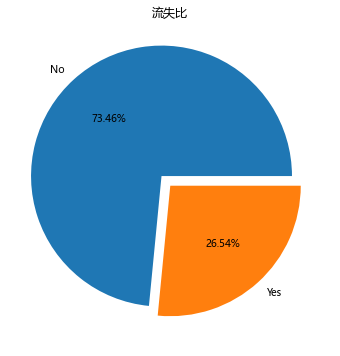

In [11]:
# 查看流失数据占比.
plt.figure(figsize=(6,6))
plt.pie(df['是否流失'].value_counts(),labels=df['是否流失'].value_counts().index,autopct='%1.2f%%',explode=(0.1,0))
plt.title('流失比')
plt.show()

     是否流失
No   5174
Yes  1869


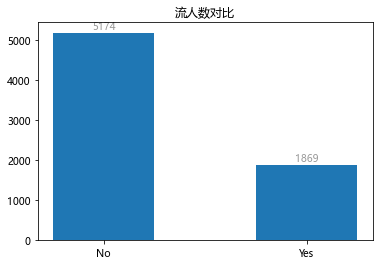

In [12]:
chur_df = df['是否流失'].value_counts().to_frame()
x = chur_df.index
y = chur_df['是否流失']
plt.bar(x,y,width=0.5)

plt.title('流人数对比')
for a,b in zip(x,y):
    plt.text(a,b+10,'%.0f' % b, ha='center', va= 'bottom',alpha=0.4)
    
print(chur_df)

In [13]:
def check(data,x_,y_,size=10):  
    plt.figure(figsize=(12,6))
    if len(data[x_].value_counts()) >=10:
        sns.distplot(data[x_][data[y_] == 'No' ],color='r', label='未流失')
        sns.distplot(data[x_][data[y_] == 'Yes' ],color='b', label='已流失')
        plt.legend()
        plt.xticks(np.arange(data[x_].min(), data[x_].max() + 1,size))
        plt.title(f'{x_}和{y_}的关联')
        plt.xlabel(x_, fontsize=12, labelpad=10)
        plt.ylabel(y_, labelpad=15)
        plt.show()
    else:
        data_ = data.groupby(y_)[x_].value_counts().to_frame()
        data_.rename(columns={ x_:f"{x_}标签数量"},inplace=True)
        data_.reset_index(inplace=True)
        
        plt.title(f'{x_}和{y_}的关联')
        sns.barplot(x=x_,y=f"{x_}标签数量",hue=y_,data=data_,alpha=0.4)
        plt.show()
        data_['比例'] = data_[f'{x_}标签数量']/(data_[f'{x_}标签数量']).sum()
        print(data_.sort_values(by=[x_,y_]))
        print('='*50)

In [14]:
# 把用户的字段根据一般经验划分成3层.
lis1 = ['性别', '是否老年人', '是否有配偶', '是否有家属'] # 个人属性
lis2 = ['服务期', '是否有电话服务', '是否有多线服务', '互联网服务类型',
 '在线安全服务', '在线备份服务', '设备保护服务', '技术支持服务',
 '流媒体电视服务', '流媒体电影服务',] # 服务属性
lis3 = [  '合同类型', '电子账单','付款方式', '每月费用', '总费用'] # 缴费属性

# 用户个人属性标签和流失关系

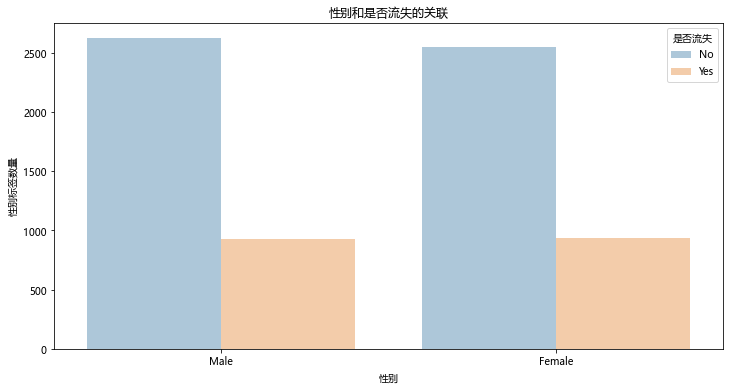

  是否流失      性别  性别标签数量        比例
1   No  Female    2549  0.361920
2  Yes  Female     939  0.133324
0   No    Male    2625  0.372710
3  Yes    Male     930  0.132046


In [15]:
# 性别和流失的关系
check(df,'性别','是否流失')

从总数到占比上看,均无明显差异,可以认为性别和流失无关

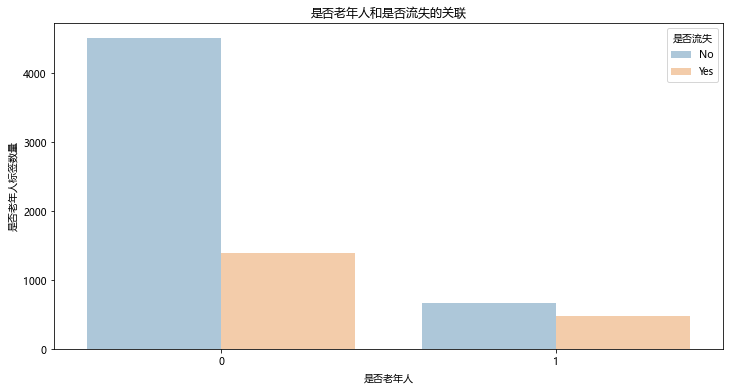

  是否流失  是否老年人  是否老年人标签数量        比例
0   No      0       4508  0.640068
2  Yes      0       1393  0.197785
1   No      1        666  0.094562
3  Yes      1        476  0.067585


In [16]:
# 是否老年人和流失的关系
check(df,'是否老年人','是否流失')

老年人的流失比例比年轻人更高,可以认为老年人和是否流失相关

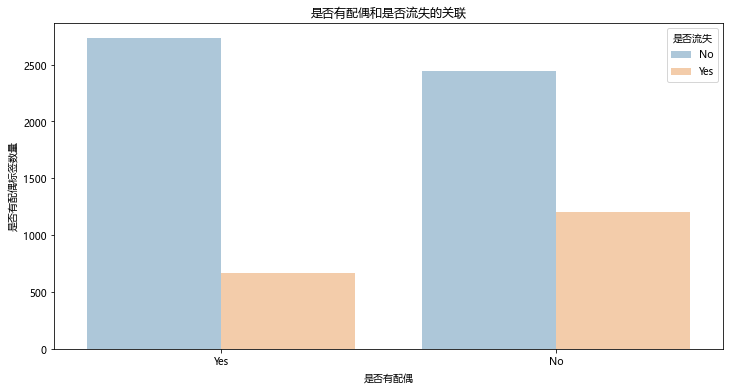

  是否流失 是否有配偶  是否有配偶标签数量        比例
1   No    No       2441  0.346585
2  Yes    No       1200  0.170382
0   No   Yes       2733  0.388045
3  Yes   Yes        669  0.094988


In [17]:
# 是否有配偶和流失的关系
check(df,'是否有配偶','是否流失')

无配偶的用户比有配偶的用户更容易流失

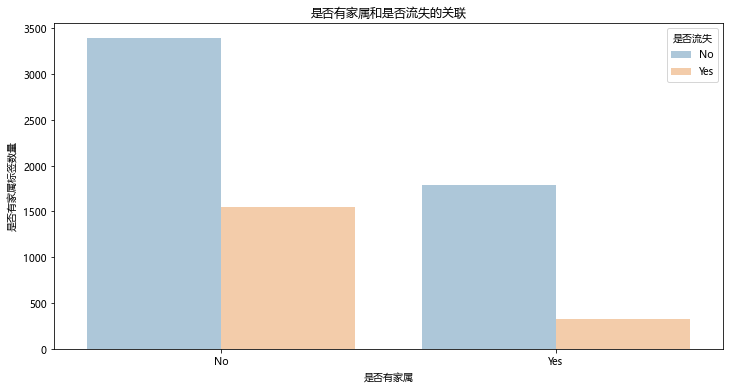

  是否流失 是否有家属  是否有家属标签数量        比例
0   No    No       3390  0.481329
2  Yes    No       1543  0.219083
1   No   Yes       1784  0.253301
3  Yes   Yes        326  0.046287


In [18]:
check(df,'是否有家属','是否流失')

没有家属的用户比有家属的用户更容易流失.

# 小结
从用户属性上看,
老年人,单身,无家庭拥有这三类标签的用户更容易流失.对于这类用户需要重点关注.

# 用户服务属性标签和流失关系

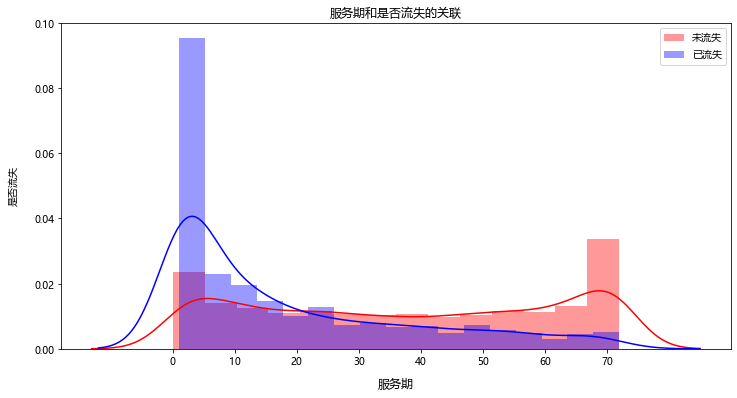

In [19]:
check(df,'服务期','是否流失')

存在相关性,服务期越短的用户越容易流失.在前20个月是用户容易流失的高峰期.如果用户在第1个月没有流失的话,后续的流失概率会从10%缩减到2%.

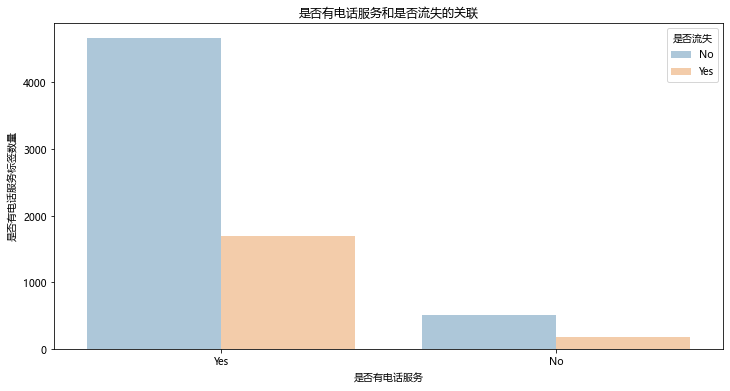

  是否流失 是否有电话服务  是否有电话服务标签数量        比例
1   No      No          512  0.072696
3  Yes      No          170  0.024137
0   No     Yes         4662  0.661934
2  Yes     Yes         1699  0.241232


In [20]:
check(df,'是否有电话服务','是否流失')

存在相关性,有电话服务的用户比没有电话服务的用户更容易流失.

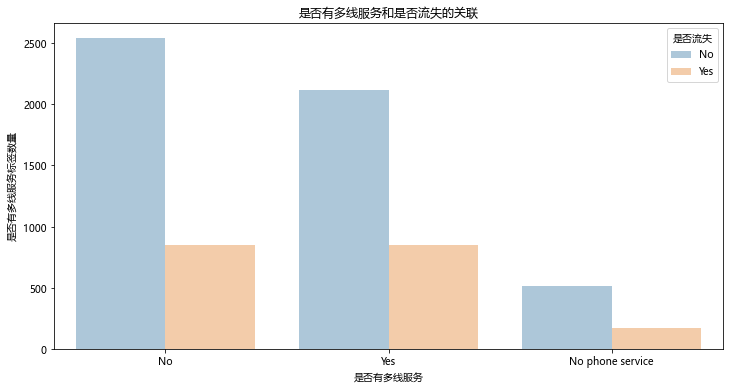

  是否流失           是否有多线服务  是否有多线服务标签数量        比例
0   No                No         2541  0.360784
4  Yes                No          849  0.120545
2   No  No phone service          512  0.072696
5  Yes  No phone service          170  0.024137
1   No               Yes         2121  0.301150
3  Yes               Yes          850  0.120687


In [21]:
check(df,'是否有多线服务','是否流失')

存在相关性,有多线服务的用户更容易流失.

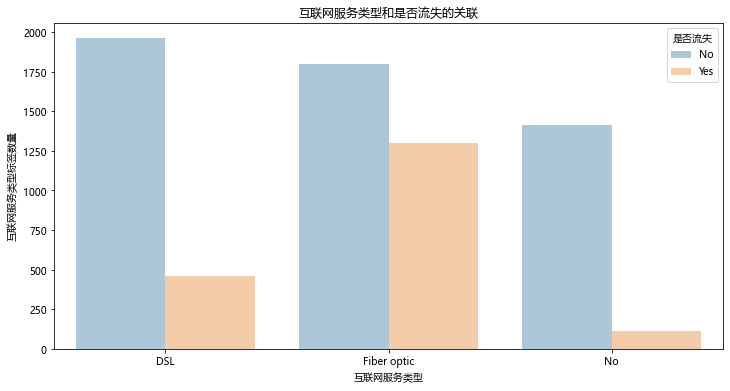

  是否流失      互联网服务类型  互联网服务类型标签数量        比例
0   No          DSL         1962  0.278574
4  Yes          DSL          459  0.065171
1   No  Fiber optic         1799  0.255431
3  Yes  Fiber optic         1297  0.184154
2   No           No         1413  0.200625
5  Yes           No          113  0.016044


In [22]:
check(df,'互联网服务类型','是否流失')

存在相关性,光纤服务的用户更容易流失.

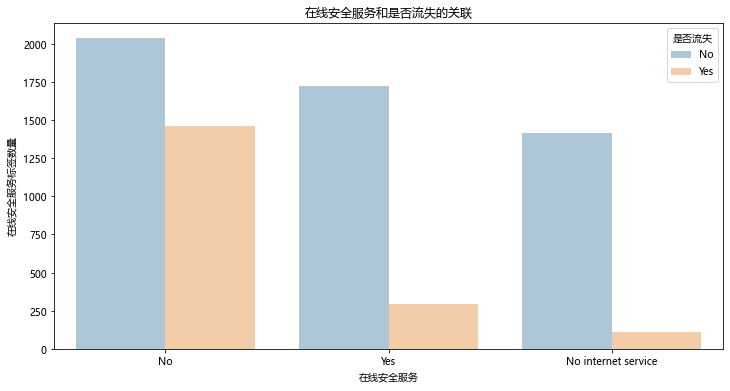

  是否流失               在线安全服务  在线安全服务标签数量        比例
0   No                   No        2037  0.289223
3  Yes                   No        1461  0.207440
2   No  No internet service        1413  0.200625
5  Yes  No internet service         113  0.016044
1   No                  Yes        1724  0.244782
4  Yes                  Yes         295  0.041886


In [23]:
check(df,'在线安全服务','是否流失')

存在相关性,无在线安全服务的用户更容易流失

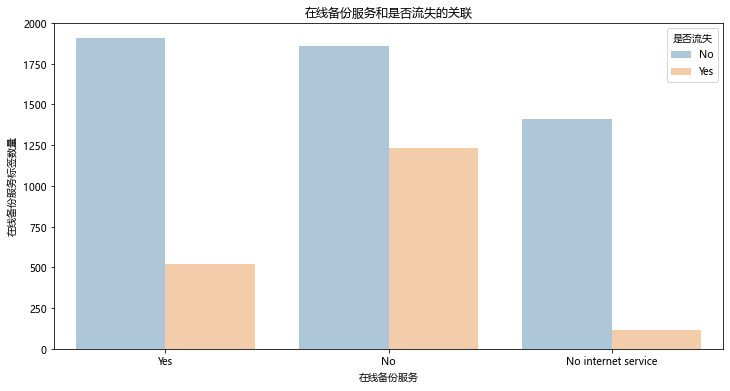

  是否流失               在线备份服务  在线备份服务标签数量        比例
1   No                   No        1855  0.263382
3  Yes                   No        1233  0.175067
2   No  No internet service        1413  0.200625
5  Yes  No internet service         113  0.016044
0   No                  Yes        1906  0.270623
4  Yes                  Yes         523  0.074258


In [24]:
check(df,'在线备份服务','是否流失')

存在相关性,无在线备份服务的用户更容易流失

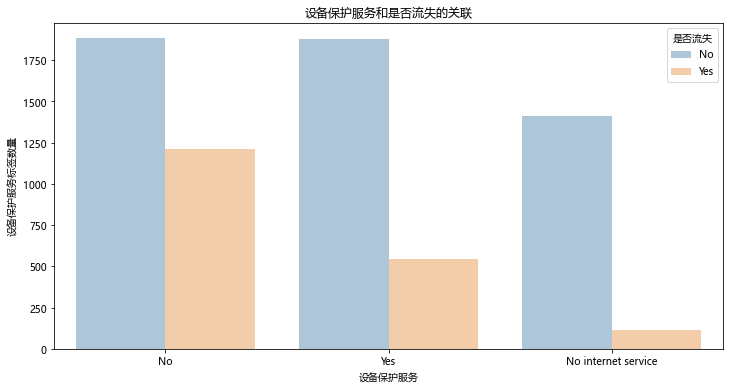

  是否流失               设备保护服务  设备保护服务标签数量        比例
0   No                   No        1884  0.267500
3  Yes                   No        1211  0.171944
2   No  No internet service        1413  0.200625
5  Yes  No internet service         113  0.016044
1   No                  Yes        1877  0.266506
4  Yes                  Yes         545  0.077382


In [25]:
check(df,'设备保护服务','是否流失')

存在相关性,无设备保护服务的用户更容易流失

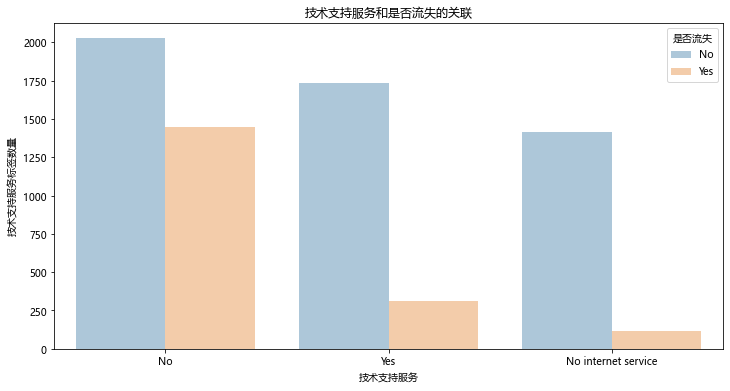

  是否流失               技术支持服务  技术支持服务标签数量        比例
0   No                   No        2027  0.287803
3  Yes                   No        1446  0.205310
2   No  No internet service        1413  0.200625
5  Yes  No internet service         113  0.016044
1   No                  Yes        1734  0.246202
4  Yes                  Yes         310  0.044015


In [26]:
check(df,'技术支持服务','是否流失')

存在相关性,无技术支持服务的用户更容易流失

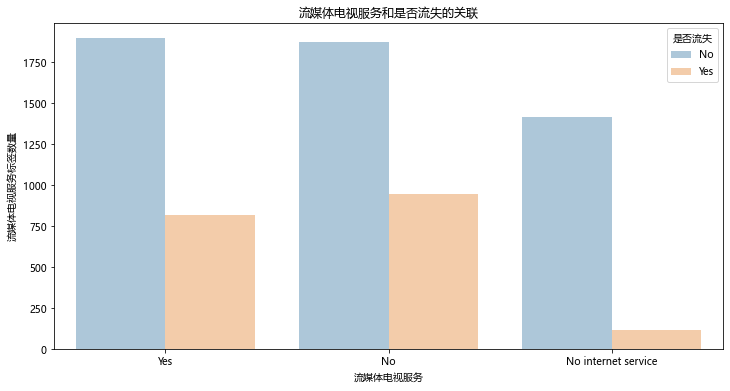

  是否流失              流媒体电视服务  流媒体电视服务标签数量        比例
1   No                   No         1868  0.265228
3  Yes                   No          942  0.133750
2   No  No internet service         1413  0.200625
5  Yes  No internet service          113  0.016044
0   No                  Yes         1893  0.268778
4  Yes                  Yes          814  0.115576


In [27]:
check(df,'流媒体电视服务','是否流失')

相关性不明显,有无流媒体电视服务的流失人数总数和比例相当.

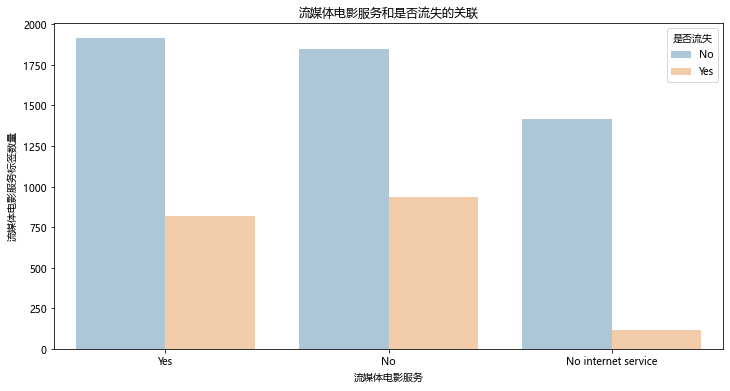

  是否流失              流媒体电影服务  流媒体电影服务标签数量        比例
1   No                   No         1847  0.262246
3  Yes                   No          938  0.133182
2   No  No internet service         1413  0.200625
5  Yes  No internet service          113  0.016044
0   No                  Yes         1914  0.271759
4  Yes                  Yes          818  0.116144


In [28]:
check(df,'流媒体电影服务','是否流失')

相关性不明显,有无流媒体电影服务的流失人数总数和比例相当.

# 小结
1.服务期在20天以内的用户更容易流失,尤其是第一天的新用户.如果能保持住新用户,那么流失率就会从10%降至2%左右.  
2.存在电话服务,多线服务,网络服务的用户更容易流失.  
3.有在线安全服务, 在线备份服务, 设备保护服务, 技术支持服务,的用户更不容易流失,可以对没开通此类服务的用户进行营销.增加收入和用户粘性.  
4.流媒体对用户的流失没有太多相关性.  

# 用户付款属性和流失关系

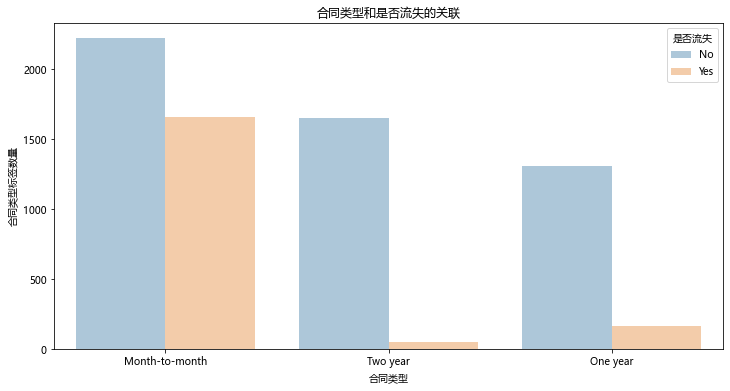

  是否流失            合同类型  合同类型标签数量        比例
0   No  Month-to-month      2220  0.315207
3  Yes  Month-to-month      1655  0.234985
2   No        One year      1307  0.185574
4  Yes        One year       166  0.023570
1   No        Two year      1647  0.233849
5  Yes        Two year        48  0.006815


In [29]:
check(df,'合同类型','是否流失')

存在相关性,每月支付的用户最容易流失,合同期越长,用户越稳定.

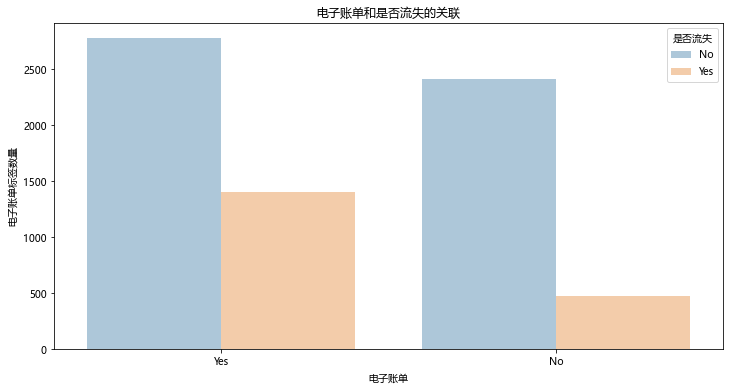

  是否流失 电子账单  电子账单标签数量        比例
1   No   No      2403  0.341190
3  Yes   No       469  0.066591
0   No  Yes      2771  0.393440
2  Yes  Yes      1400  0.198779


In [30]:
check(df,'电子账单','是否流失')

使用电子账单的用户更容易流失

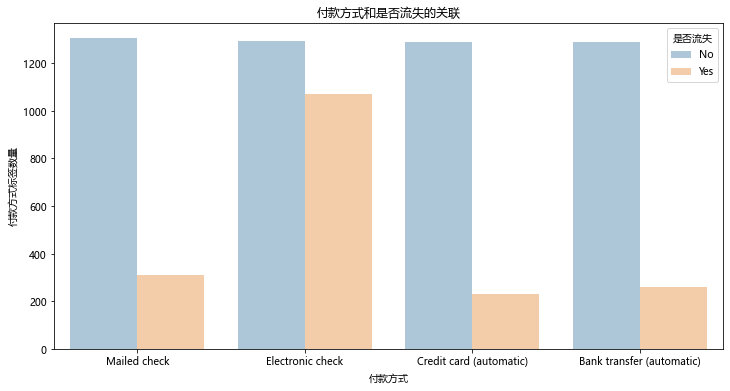

  是否流失                       付款方式  付款方式标签数量        比例
3   No  Bank transfer (automatic)      1286  0.182593
6  Yes  Bank transfer (automatic)       258  0.036632
2   No    Credit card (automatic)      1290  0.183161
7  Yes    Credit card (automatic)       232  0.032941
1   No           Electronic check      1294  0.183729
4  Yes           Electronic check      1071  0.152066
0   No               Mailed check      1304  0.185148
5  Yes               Mailed check       308  0.043731


In [31]:
check(df,'付款方式','是否流失')

使用电子支票的用户更容易流失

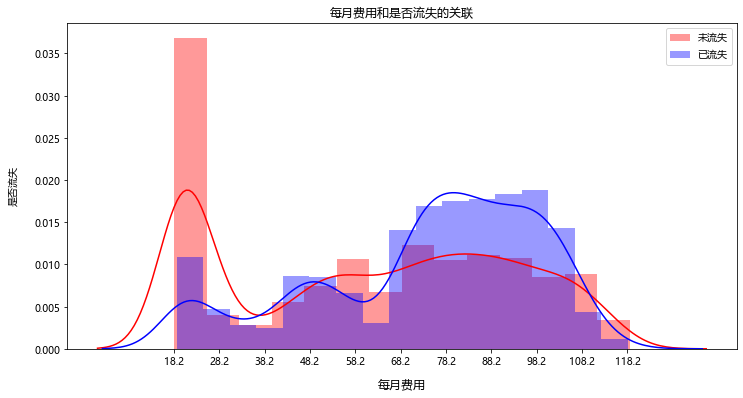

In [32]:
check(df,'每月费用','是否流失')

账单金额在68.2~108,2间的用户最容易流失.

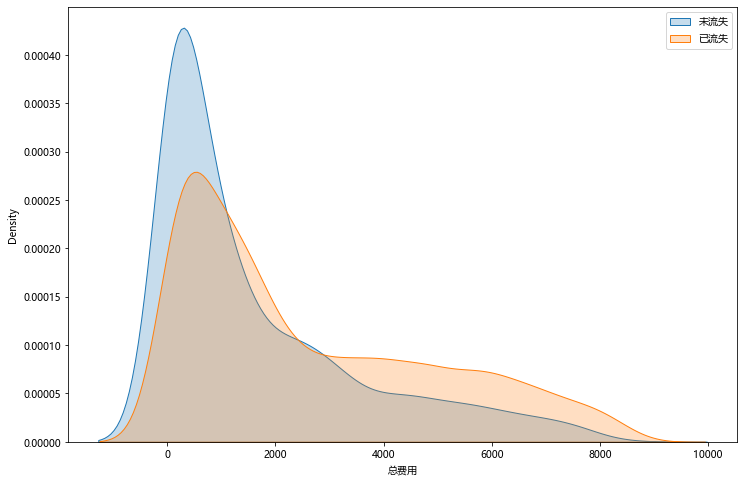

In [33]:
plt.figure(figsize=(12,8))
temp = (df.groupby(['是否流失'])['总费用'].value_counts() / len(df['是否流失'])).sort_values(ascending=False).to_frame()

temp.rename(columns={"总费用":'总费用情况'},inplace=True)
temp.reset_index(inplace=True)

sns.kdeplot(temp[temp['是否流失']=='Yes']['总费用'].dropna(),  label='未流失',shade = True)
sns.kdeplot(temp[temp['是否流失']=='No']['总费用'].dropna(), label='已流失',shade = True)
plt.legend()
plt.show()

In [34]:
df.groupby(['是否流失'])['总费用'].describe()

,count,mean,std,min,25%,50%,75%,max
是否流失,,,,,,,,
No,5174.0,2549.999497,2329.858843,18.80,572.9,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5,703.550,2331.30,8684.80


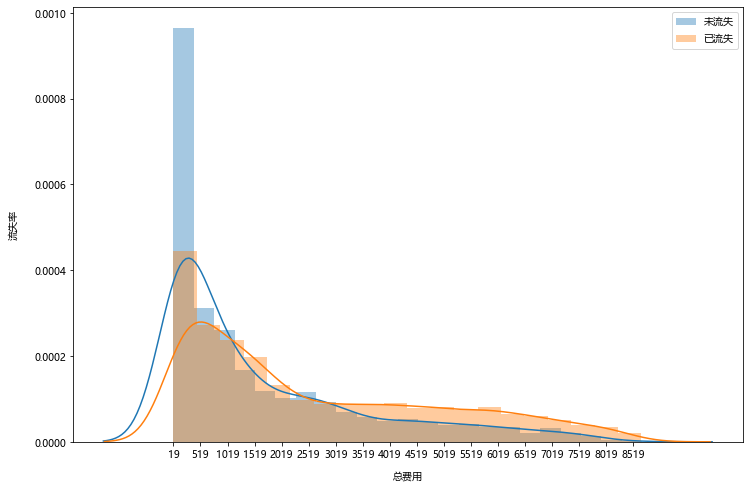

In [35]:
plt.figure(figsize=(12,8))
sns.distplot(temp[temp['是否流失']=='Yes']['总费用'].dropna(),  label='未流失')
sns.distplot(temp[temp['是否流失']=='No']['总费用'].dropna(), label='已流失')
plt.xticks(np.arange(df['总费用'].min(), df['总费用'].max() + 1,500))
plt.xlabel('总费用', fontsize=10, labelpad=10)
plt.ylabel('流失率', labelpad=15)

plt.legend()
plt.show()

In [36]:
def check_total(x):
    if x < 500 :
        return 1 # 新用户
    elif x>2500:
        return 3 # 容易流失
    else:
        return 2 # 可能流失

In [37]:
df['总费用分层'] = df.apply(lambda x: check_total(x['总费用']),axis = 1)

In [38]:
df.groupby(['总费用分层'])['是否流失'].value_counts()

总费用分层  是否流失
1      No      1182
       Yes      829
2      No      1923
       Yes      612
3      No      2069
       Yes      428
Name: 是否流失, dtype: int64

可以看出费用越高的用户流失率越低.
订单总金额在500以下的用户最容易流失.500~2500之间的用户相对稳定,2500以上的用户不容易流失.

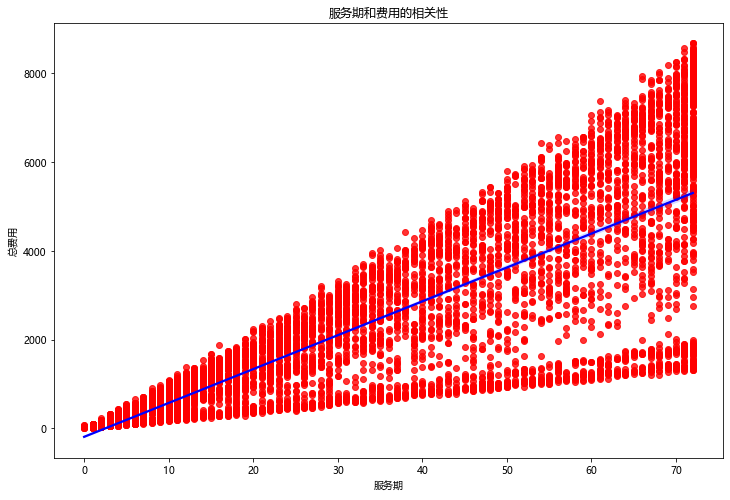

In [39]:
# 探索费用和服务期的关系
plt.figure(figsize=(12,8))
plt.title('服务期和费用的相关性')
sns.regplot(data=df,x='服务期',y='总费用',scatter_kws={'color':'r'}, line_kws={'color':'b'})
plt.show()

可以看出服务期和费用有比较明显的线性关系.时间越久的用户费用越高.同时能有相对明显的3层用户(最下方的点,最上方密集的部分,和中间比较分散的部分).
进行下一步探索.

In [40]:
# 探索月账单费用和总费用的关系
# 因为月账单费用比较高的用户流失率很高，因此观察下月账单费用较高的用户一般服务期多久，总额多少便流失。
def check_month(x):
    if x <= 20 :
        return 0 
    elif x>20 and x<= 50:
        return 1 
    elif x > 50 and x <= 60:
        return 2 
    elif x>70 :
        return 4
    else:
        return 3
    
df['每月费用分级'] = df.apply(lambda x: check_month(x['每月费用']),axis = 1)

In [41]:
print('总体服务期平均数：',df.groupby(['是否流失'])['服务期'].mean())
print()
print('总体服务期众数：',df.groupby(['是否流失'])['服务期'].apply(lambda x:x.mode()))

总体服务期平均数： 是否流失
No     37.569965
Yes    17.979133
Name: 服务期, dtype: float64

总体服务期众数： 是否流失   
No    0    72
Yes   0     1
Name: 服务期, dtype: int64


In [42]:
print('分级后每月费用平均数：',df.groupby(['每月费用分级','是否流失'])['每月费用'].mean())
print()
print('分级后服务期平均数：',df.groupby(['每月费用分级','是否流失'])['服务期'].mean())

分级后每月费用平均数： 每月费用分级  是否流失
0       No      19.589632
        Yes     19.600000
1       No      29.376567
        Yes     36.218152
2       No      55.043265
        Yes     54.059302
3       No      65.404767
        Yes     67.458036
4       No      91.023877
        Yes     88.785320
Name: 每月费用, dtype: float64

分级后服务期平均数： 每月费用分级  是否流失
0       No      28.566890
        Yes      8.034483
1       No      30.930597
        Yes      9.201320
2       No      31.016327
        Yes     14.472868
3       No      37.302326
        Yes     10.830357
4       No      45.172280
        Yes     21.522494
Name: 服务期, dtype: float64


In [43]:
print('分级后每月费用众数：',df.groupby(['每月费用分级','是否流失'])['每月费用'].apply(lambda x:x.mode()))
print()
print('分级后服务期众数：',df.groupby(['每月费用分级','是否流失'])['服务期'].apply(lambda x:x.mode()))

分级后每月费用众数： 每月费用分级  是否流失   
0       No    0    19.70
              1    19.95
        Yes   0    19.75
1       No    0    20.05
        Yes   0    45.30
2       No    0    60.00
        Yes   0    55.00
3       No    0    69.50
              1    69.95
        Yes   0    70.00
4       No    0    84.80
              1    89.85
        Yes   0    74.40
Name: 每月费用, dtype: float64

分级后服务期众数： 每月费用分级  是否流失   
0       No    0     1
        Yes   0     1
1       No    0     1
        Yes   0     1
2       No    0     1
        Yes   0     1
3       No    0    72
        Yes   0     1
4       No    0    72
        Yes   0     1
Name: 服务期, dtype: int64


In [44]:
df.groupby(['每月费用分级','是否流失'])['服务期'].describe().astype(int)

count  mean  std  min  25%  50%  75%  max
每月费用分级 是否流失                                           
0      No      598    28   23    0    8   23   48   72
       Yes      58     8   13    1    1    2    8   61
1      No     1340    30   23    0    8   26   52   72
       Yes     303     9   14    1    1    3   10   71
2      No      490    31   21    0   11   27   49   72
       Yes     129    14   16    1    1    6   22   72
3      No      430    37   23    0   15   37   60   72
       Yes     112    10   15    1    1    2   16   70
4      No     2316    45   22    0   26   50   66   72
       Yes    1267    21   20    1    4   14   35   72

# 小结 
1.付款方式是电子支付.每月支付,费用在70-110之间的用户更容易流失.   
2.结合用户服务属性来看.在线安全服务, 在线备份服务, 设备保护服务, 技术支持服务，订阅了这些服务的用户流失率更低。因此可以尝试对未订阅这些服务的用户进行营销。可能可以在不提高流失率的情况下增加这些用户的账单金额。  
3.结合每月费用的平均值和众数，可以看出，付费越低，用户越容易流失。付费比较高的用户中，有小部分一直到现在才流失。这部分用户值得关注。    
4.在0、1、2三个阶段流失最多的用户都是1，这说明大部分流失的用户都是当月流失。不同层级的平均流失期略有不同，大概分布在8~10之间。因此可以在
新用户当月、注册后六月，采取措施稳定客户，降低流失率。

# 用户分层

In [45]:
df_copy1 = df.loc[:,['服务期','每月费用分级']].copy()

scaler = StandardScaler()  # 标准化数据集
scaled_data = scaler.fit_transform(df_copy1)  # 拟合并标准化数据集

silhouette_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i ,init ='k-means++',random_state = 1, max_iter = 200)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = metrics.silhouette_score(scaled_data,cluster_labels)
    silhouette_scores.append(silhouette_avg)
    


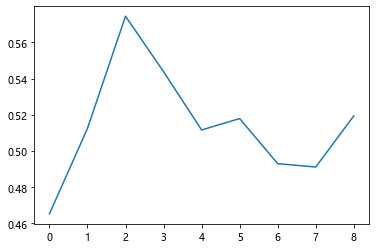

In [46]:
plt.plot(silhouette_scores)
# 下标为2，即4效果最好

In [47]:
kmeans = KMeans(n_clusters=4 ,init ='k-means++',random_state = 1, max_iter = 200)
cluster_labels = kmeans.fit_predict(scaled_data)
df_copy1['聚类标签'] = kmeans.labels_

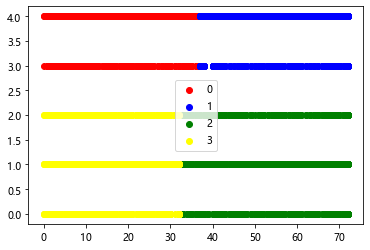

In [48]:
colors = ['red', 'blue', 'green', 'yellow', 'purple']
grouped = df_copy1.groupby('聚类标签')
fig, ax = plt.subplots()
for label, group in grouped:
    ax.scatter(group['服务期'], group['每月费用分级'], c=colors[label], label=label)
ax.legend()
plt.show()

In [49]:
def check_label(x):
    if x== 3:
        return "一般价值短期用户"
    elif x == 2:
        return "一般价值长期用户"
    elif x== 1:
        return "高价值长期用户"
    elif x == 0:
        return "高价值短期用户"
    
    
df_copy1['聚类标签'] = df_copy1.apply(lambda x:check_label(x['聚类标签']),axis=1)

In [50]:
df_res = pd.concat([df,df_copy1['聚类标签']],axis=1)

In [51]:
df_res.head()

,客户ID,性别,是否老年人,是否有配偶,是否有家属,服务期,是否有电话服务,是否有多线服务,互联网服务类型,在线安全服务,...,流媒体电影服务,合同类型,电子账单,付款方式,每月费用,总费用,是否流失,总费用分层,每月费用分级,聚类标签
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,1,一般价值短期用户
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,2,2,一般价值长期用户
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,2,一般价值短期用户
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2,1,一般价值长期用户
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,4,高价值短期用户


# 流失预测

In [52]:
# 标签转化
# 比较有价值的列
lis = ['是否有配偶', '是否有家属', 
 '是否有电话服务', '是否有多线服务', 
 '在线安全服务', '在线备份服务', '设备保护服务', '技术支持服务',
 '流媒体电视服务', '流媒体电影服务',  '电子账单', 
 '是否流失']

def check_y_n(x):
    if x == 'Yes':
        return 1
    elif  x == 'No':
        return 0
    else:
        return 2

for i in lis:
    df_res[i] = df_res[i].apply(check_y_n)

In [53]:
df_res['合同类型'].replace({'Month-to-month':1 ,'One year':2, 'Two year':3},inplace =True)
df_res['互联网服务类型'].replace({'DSL':2,'Fiber optic':3,'No':1},inplace =True)
df_res['付款方式'].replace({'Electronic check':3 ,'Mailed check':3, 'Bank transfer (automatic)':2,'Credit card (automatic)' :1},inplace =True)

In [54]:
df_res.head()

,客户ID,性别,是否老年人,是否有配偶,是否有家属,服务期,是否有电话服务,是否有多线服务,互联网服务类型,在线安全服务,...,流媒体电影服务,合同类型,电子账单,付款方式,每月费用,总费用,是否流失,总费用分层,每月费用分级,聚类标签
0,7590-VHVEG,Female,0,1,0,1,0,2,2,0,...,0,1,1,3,29.85,29.85,0,1,1,一般价值短期用户
1,5575-GNVDE,Male,0,0,0,34,1,0,2,1,...,0,2,0,3,56.95,1889.50,0,2,2,一般价值长期用户
2,3668-QPYBK,Male,0,0,0,2,1,0,2,1,...,0,1,1,3,53.85,108.15,1,1,2,一般价值短期用户
3,7795-CFOCW,Male,0,0,0,45,0,2,2,1,...,0,2,0,2,42.30,1840.75,0,2,1,一般价值长期用户
4,9237-HQITU,Female,0,0,0,2,1,0,3,0,...,0,1,1,3,70.70,151.65,1,1,4,高价值短期用户


<AxesSubplot:>

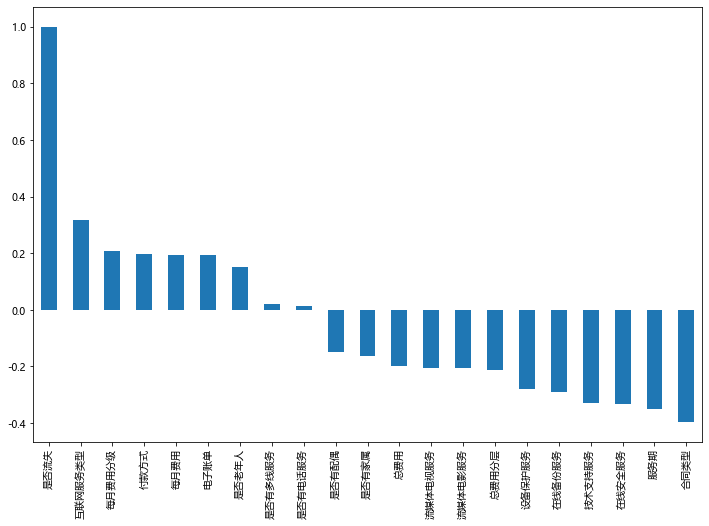

In [55]:
plt.figure(figsize=(12,8))
df_res.corr()['是否流失'].sort_values(ascending=False).plot(kind='bar')


In [56]:
df_train = df_res.drop(columns=['是否流失','客户ID','性别','聚类标签'],axis=1)
df_test = df_res['是否流失']

x_train,x_test = df_train[:5600],df_train[5600:]
y_train,y_test = df_test[:5600],df_test[5600:]

In [57]:
classifiers = [    
                SVC(random_state = 1, kernel = 'rbf'),
                DecisionTreeClassifier(random_state = 1, criterion = 'gini'),
                RandomForestClassifier(random_state = 1, criterion = 'gini',max_depth=55,min_samples_leaf=50,n_estimators = 200),
                KNeighborsClassifier(metric = 'minkowski'),
                AdaBoostClassifier(random_state = 1),
                MLPClassifier(random_state = 1),
                GaussianNB(),
                LogisticRegression(random_state=1)]

# 分类器名称
classifier_names = [            
    'svc',             
    'decisiontreeclassifier',            
    'randomforestclassifier',            
    'kneighborsclassifier',            
    'adaboostclassifier',            
    'mlpclassifier',            
    'gaussiannb',            
    'logisticregression'
]

# 分类器参数
classifier_param_grid = [            
        {'svc__C':[0.1], 'svc__gamma':[0.01]},
        {'decisiontreeclassifier__max_depth':[6,9,11]},
        {'randomforestclassifier__n_estimators':range(1,11)} ,
        {'kneighborsclassifier__n_neighbors':[4,6,8]},
        {'adaboostclassifier__n_estimators':[70,80,90]},
        {'mlpclassifier__hidden_layer_sizes':[(100,50),(80,40),(90,),(50,20)]},
        {},
        {'logisticregression__penalty':['l1','l2']}
]


In [58]:
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy_score'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv=3, scoring = score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print(f"GridSearch 最优参数：{search.best_params_}" )
    print(f"GridSearch 最优分数:{search.best_score_.round(4)}" )
    predict_y = gridsearch.predict(test_x)
    print(f"准确率{accuracy_score(test_y, predict_y).round(4)}" )
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response
 
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    #采用 StandardScaler 方法对数据规范化：均值为0，方差为1的正态分布
    pipeline = Pipeline([
            (model_name, model)
    ])
    model = GridSearchCV_work(pipeline, x_train, y_train, x_test, y_test, model_param_grid , score = 'accuracy')


GridSearch 最优参数：{'svc__C': 0.1, 'svc__gamma': 0.01}
GridSearch 最优分数:0.7559
准确率0.7609
GridSearch 最优参数：{'decisiontreeclassifier__max_depth': 6}
GridSearch 最优分数:0.7873
准确率0.7817
GridSearch 最优参数：{'randomforestclassifier__n_estimators': 9}
GridSearch 最优分数:0.8011
准确率0.7942
GridSearch 最优参数：{'kneighborsclassifier__n_neighbors': 8}
GridSearch 最优分数:0.7743
准确率0.7872
GridSearch 最优参数：{'adaboostclassifier__n_estimators': 80}
GridSearch 最优分数:0.8012
准确率0.8018
GridSearch 最优参数：{'mlpclassifier__hidden_layer_sizes': (90,)}
GridSearch 最优分数:0.7789
准确率0.7845
GridSearch 最优参数：{}
GridSearch 最优分数:0.71
准确率0.7152
GridSearch 最优参数：{'logisticregression__penalty': 'l2'}
GridSearch 最优分数:0.7991
准确率0.8011


In [59]:
model =  AdaBoostClassifier(n_estimators=80)
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=80)

In [60]:
# 评估模型效果
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

cr_train = classification_report(y_train, train_pred)
cr_test = classification_report(y_test, test_pred)

cm_train = confusion_matrix(y_train, train_pred)
cm_test = confusion_matrix(y_test, test_pred)

In [61]:
print('1. 训练分类报告 : \n')
print(cr_train)
print('\n\n2. 测试分类报告 : \n')
print(cr_test)


1. 训练分类报告 : 

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4123
           1       0.68      0.54      0.60      1477

    accuracy                           0.81      5600
   macro avg       0.76      0.73      0.74      5600
weighted avg       0.80      0.81      0.80      5600



2. 测试分类报告 : 

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1051
           1       0.68      0.51      0.58       392

    accuracy                           0.80      1443
   macro avg       0.76      0.71      0.73      1443
weighted avg       0.79      0.80      0.79      1443



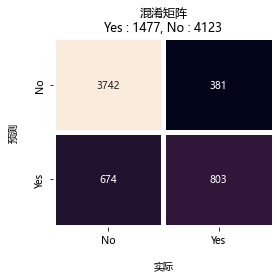

In [62]:
# 输出矩阵
plt.figure(figsize=(4,4))
plt.title(f'混淆矩阵\nYes : {y_train.value_counts().tolist()[1]}, No : {y_train.value_counts().tolist()[0]}')
sns.heatmap(cm_train, annot=True, fmt="", linewidths=5, cbar=False)
plt.xticks([0.5, 1.5], ["No", "Yes"])
plt.xlabel('实际', fontsize=10, labelpad=15)
plt.yticks([0.5, 1.5], ["No", "Yes"])
plt.ylabel('预测', fontsize=10, labelpad=15)

plt.tight_layout()
plt.show()

# 小结
模型在预测1(未流失)的部分召回率和准确率都达到80%以上.模型预测为未流失的用户准确率可达8成.在预测-1(已流失)的部分只有50%左右,表现稍差.模型预测可能流失的用户情况下,准确率只有6成.